In [2]:
from sklearn.datasets import make_blobs

In [3]:
features, true_labels = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

In [4]:
 features[:5]
 

array([[ 0.42857674,  4.9739971 ],
       [ 1.61990909,  0.06764529],
       [ 1.43289271,  4.37679234],
       [-1.57846247,  3.03445802],
       [-1.65862863,  2.26746029]])

In [5]:
true_labels[:5]

array([0, 1, 0, 2, 2])

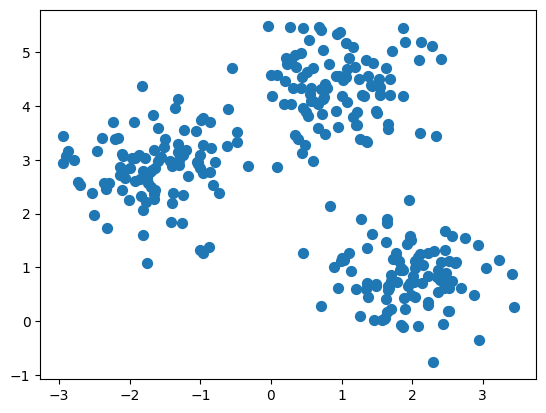

In [6]:
import matplotlib.pyplot as plt
plt.scatter(features[:, 0], features[:, 1], s=50)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [10]:
scaled_features[:5]

array([[-0.00288843,  1.46120589],
       [ 0.73445459, -1.67573046],
       [ 0.61870585,  1.07937569],
       [-1.2450912 ,  0.22113774],
       [-1.29470788, -0.26925169]])

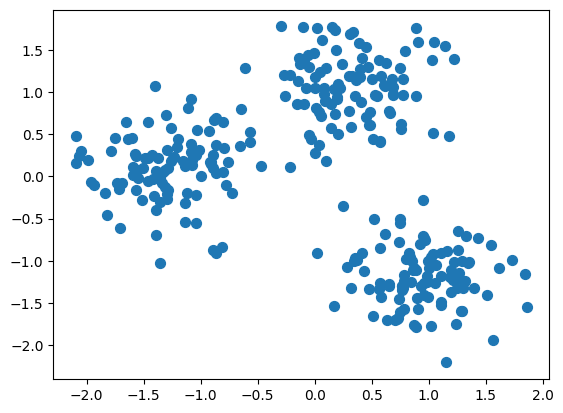

In [11]:
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], s=50)

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans( init="random", n_clusters=4,random_state=42)

In [13]:
kmeans.fit(scaled_features)
y_kmeans = kmeans.predict(scaled_features)

c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


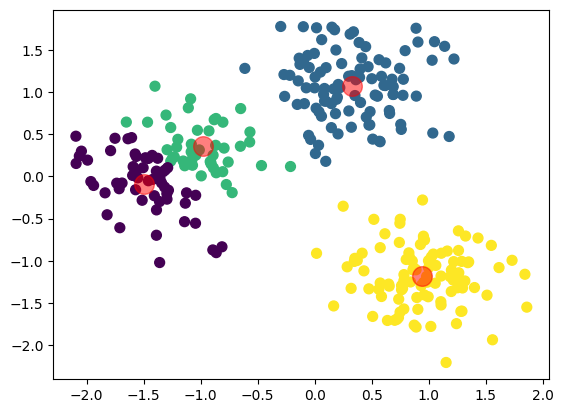

In [16]:
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=y_kmeans,
s=50, cmap='viridis')
#getting the coordinates of the centers
centers = kmeans.cluster_centers_
#plotting the centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [17]:
kmeans_kwargs = {"init": "random", "random_state": 42}
# A list holds the SSE values for each k
sse = []
#computing the SSE for different numbers of clusters
for k in range(1, 11):
 kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
 kmeans.fit(scaled_features)
 sse.append(kmeans.inertia_)#getting the SSE

c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

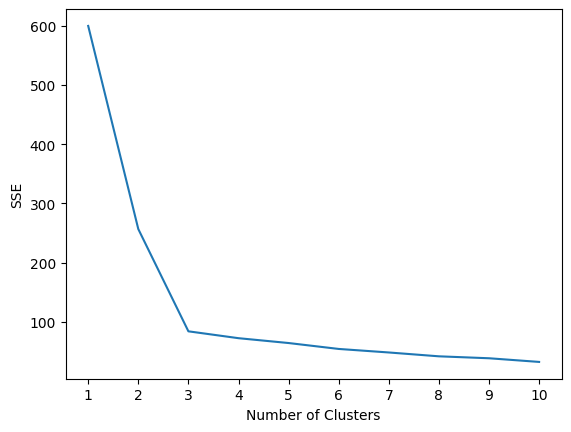

In [18]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()